### Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
%%HTML
<style>
table.dataframe th, table.dataframe td{
    border: 0.5px solid black;
}
</style>

In [5]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### EDA

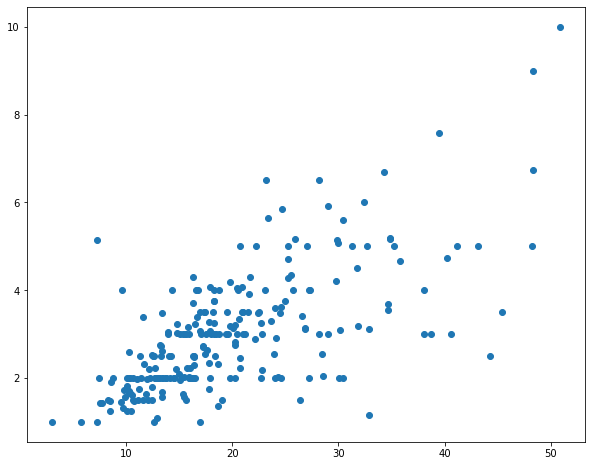

In [6]:
plt.figure(figsize= (10, 8))
plt.scatter(x= tips.total_bill, y= tips.tip)

So, there is a linear relationship(approx.) we can assume between 'total_bill' and 'tip' column. When total bill increases, tip also increases.

Also, see that the congestion of points is the most between 10 and 20. That means the variation of tips in that mentioned range (10-20) is very little in contrast to range (30-40) or (40-50).

<BarContainer object of 2 artists>

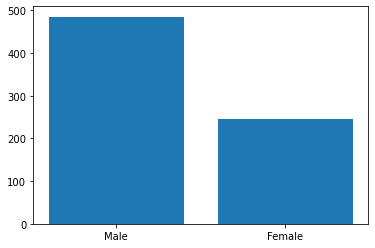

In [7]:
gender_sr = tips.groupby('sex')['tip'].sum()
plt.bar(x= gender_sr.index, height= gender_sr.values)

So, Male persons have given more tips than female ones.

In [8]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

It's pretty much obvious that as No. of Male is greater than No. of Female, that's the reason of the difference between total tips.

So, let's calculate the averages and plot it

<BarContainer object of 2 artists>

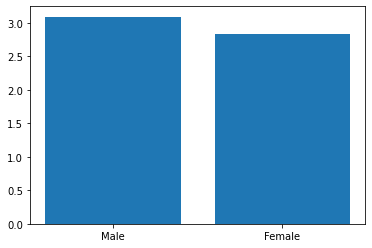

In [9]:
male_avg_tips = gender_sr['Male'] / tips['sex'].value_counts()[0]
female_avg_tips = gender_sr['Female'] / tips['sex'].value_counts()[1]
plt.bar(x= ['Male', 'Female'], height= [male_avg_tips, female_avg_tips])

The average is also indicating that on average, female persons have paid less tips.

Text(0.5, 1.0, 'Average tips based on smoker type')

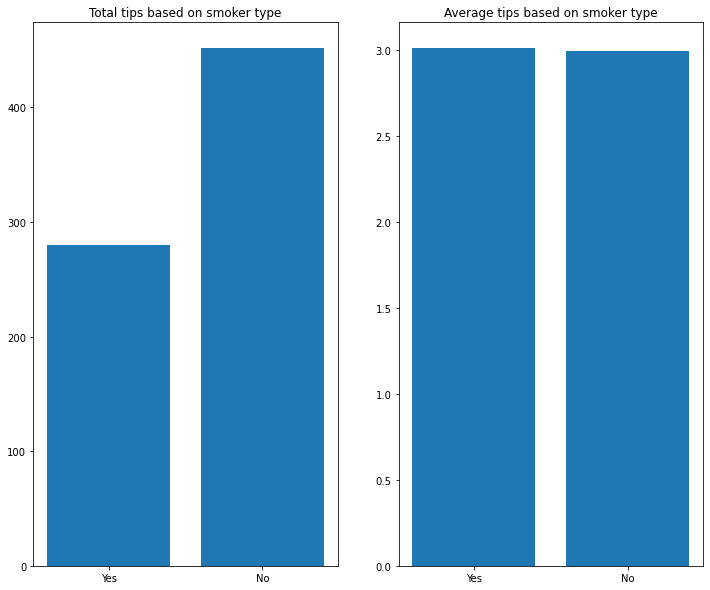

In [10]:
fig, (axes1, axes2) = plt.subplots(1, 2, figsize= (12, 10))
smoker_sr = tips.groupby('smoker').sum()['tip'].sort_values()
axes1.bar(smoker_sr.index, smoker_sr.values)
axes1.set_title('Total tips based on smoker type')
smoker_yes = smoker_sr['Yes'] / tips['smoker'].value_counts().sort_values()[0]
smoker_no = smoker_sr['No'] / tips['smoker'].value_counts().sort_values()[1]
axes2.bar(x= ['Yes', 'No'], height= [smoker_yes, smoker_no])
axes2.set_title('Average tips based on smoker type')

Although there is huge difference between tips paid by smoker and non-smoker types but their average is almost similar.

<BarContainer object of 4 artists>

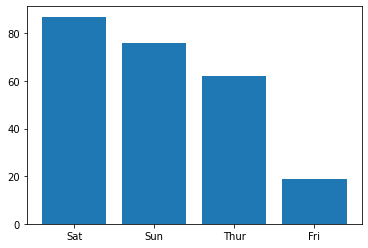

In [11]:
plt.bar(x= tips.day.value_counts().index, height= tips.day.value_counts().values)

Most of the people had attended lunch/dinner in that restaurant on Saturday

Text(0.5, 1.0, 'Average tips based on day')

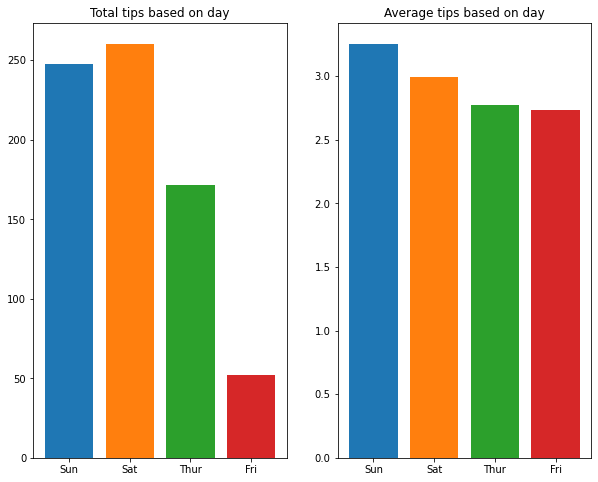

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (10, 8))
for col in tips.day.unique():
    ax1.bar(col, tips[tips.day == col]['tip'].sum())
    ax2.bar(col, tips[tips.day == col]['tip'].mean())
ax1.set_title('Total tips based on day')
ax2.set_title('Average tips based on day')

Although total tips is the most for Saturday but on sunday, the restaurant received the highest average tip.

In [13]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

Most people visited there for dinner rather than lunch.

Text(0.5, 1.0, 'Average tips based on time of the day')

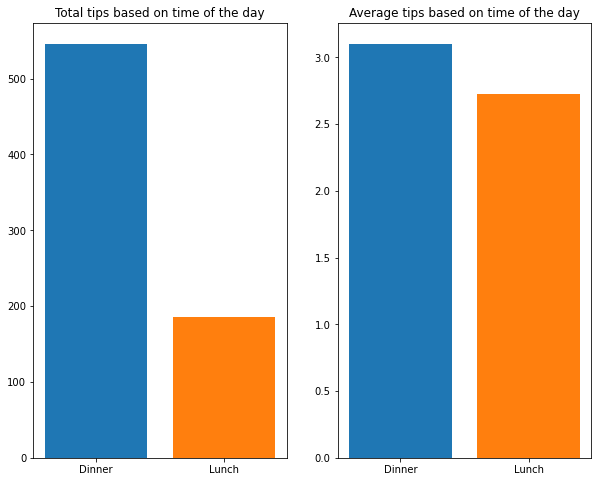

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (10, 8))
for col in tips.time.unique():
    ax1.bar(col, tips[tips.time == col]['tip'].sum())
    ax2.bar(col, tips[tips.time == col]['tip'].mean())
ax1.set_title('Total tips based on time of the day')
ax2.set_title('Average tips based on time of the day')

Most tips are given when people came for dinner.

<AxesSubplot:xlabel='size', ylabel='count'>

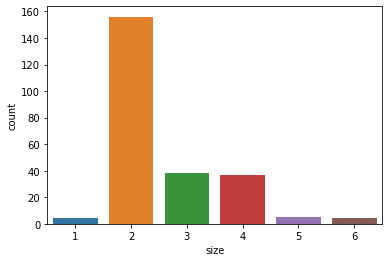

In [15]:
sns.countplot(x= tips['size'])

Most groups were 2 in size.

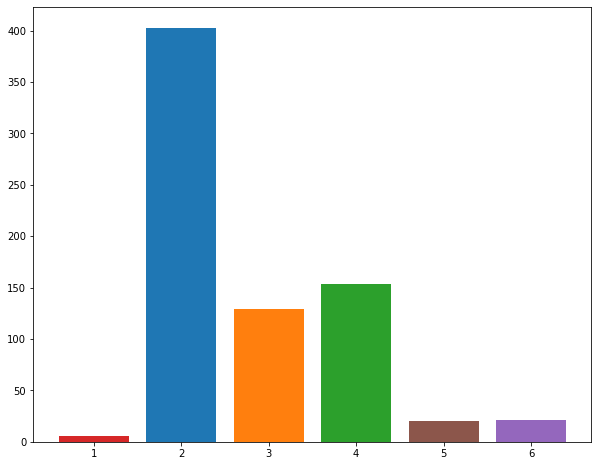

In [16]:
fig, ax3 = plt.subplots(1, 1, figsize= (10, 8))
for val in tips['size'].unique():
    ax3.bar(val, tips[tips['size'] == val]['tip'].sum())

Most amount of tips came from groups of 2 people.

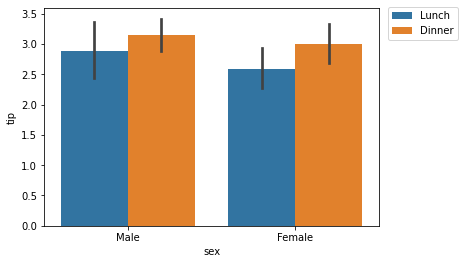

In [17]:
sns.barplot(x= tips['sex'], y= tips['tip'], hue= tips['time'])
plt.legend(loc= 'upper right',bbox_to_anchor= (1.25, 1.03))

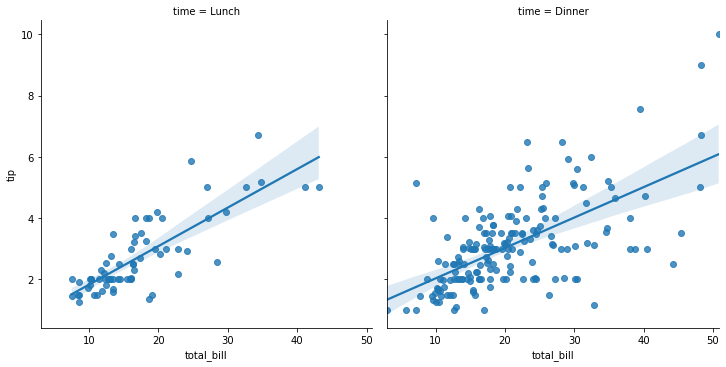

In [18]:
sns.lmplot(x= 'total_bill', y= 'tip', col= 'time', data= tips)

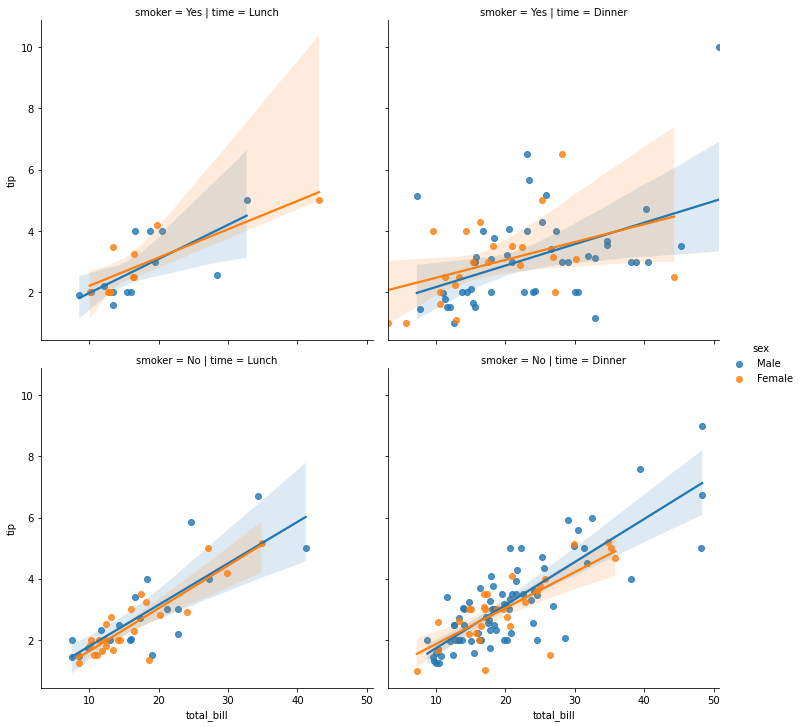

In [19]:
sns.lmplot(x= 'total_bill', y= 'tip', hue= 'sex', col= 'time', row= 'smoker', data= tips)

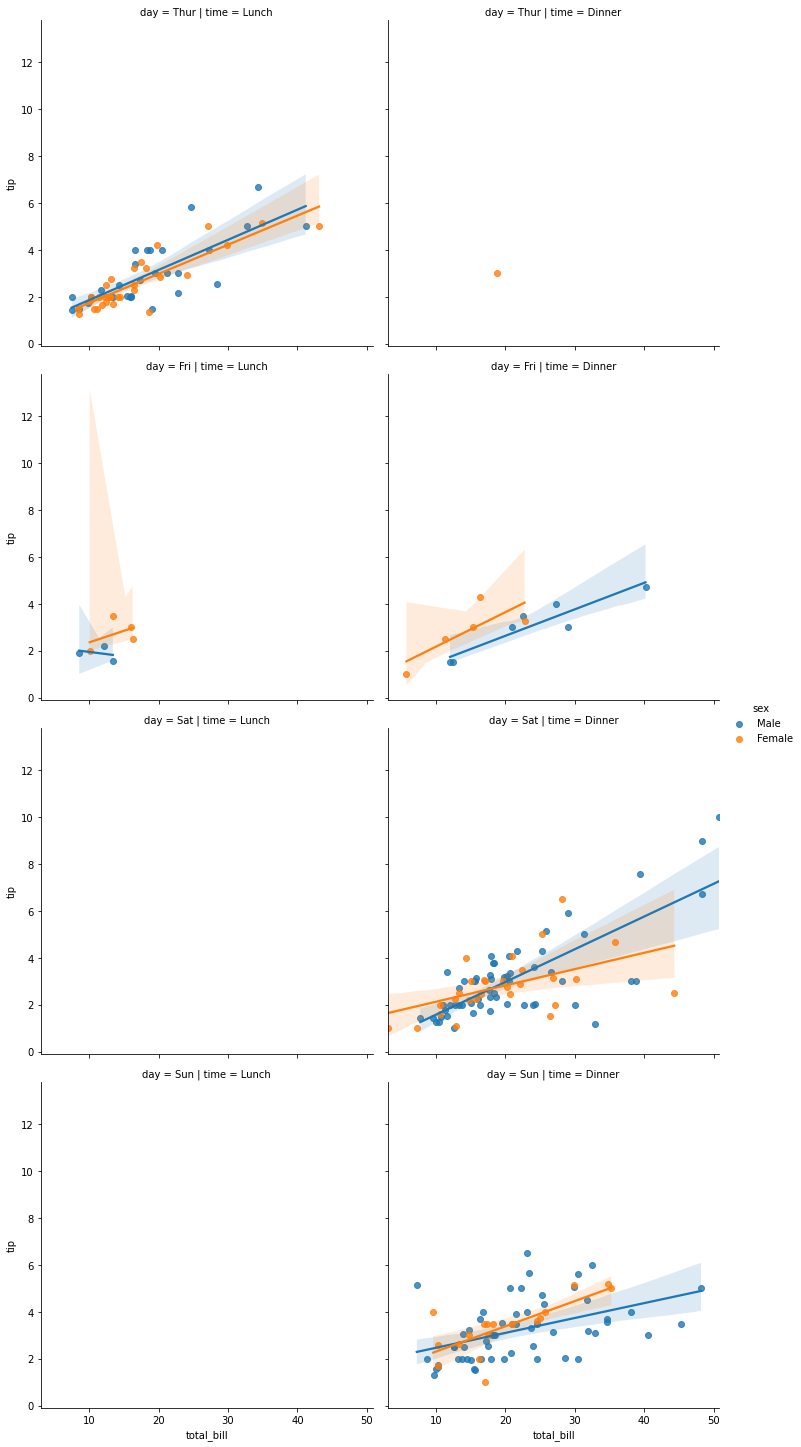

In [20]:
sns.lmplot(x= 'total_bill', y= 'tip', hue= 'sex', col= 'time', row= 'day', data= tips)

#### Similar implementation using 'Facetgrid' is below:

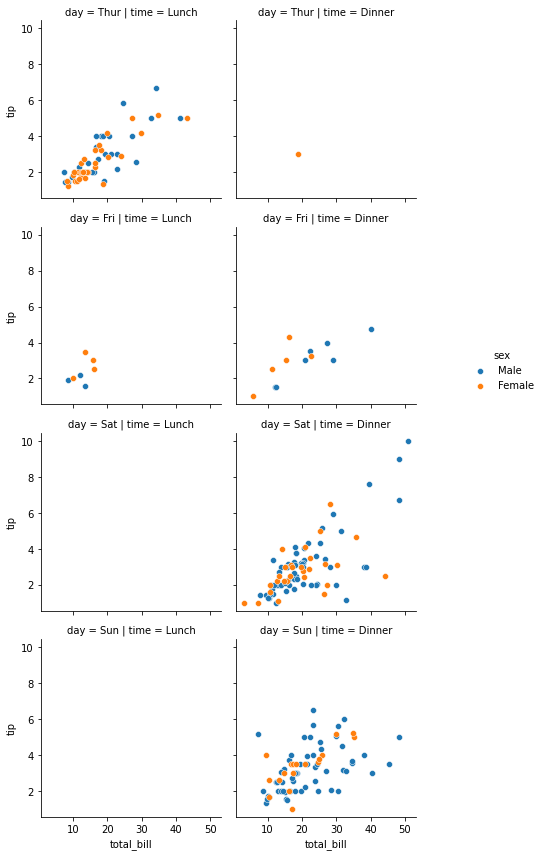

In [21]:
grd= sns.FacetGrid(tips, col= 'time', row= 'day', hue= 'sex')
grd.map(sns.scatterplot, 'total_bill', 'tip')
grd.add_legend(loc= 'upper right', bbox_to_anchor = (1.1, 0.6))

#### Some insights we can derive are:
 - The day on which most no. of people have taken lunch in Thursday.
 - The day on which most no. of people have taken dinner is Saturday.
 - Only 1 female person has taken lunch on Thursday.
 - Noone has taken lunch on Sunday and Saturday.
 - Maximum amount of tip is given by a male person on Saturday.
 - Minimum tip is given in Saturday as well by a female person.
 - Less no. of people visited it on Friday.

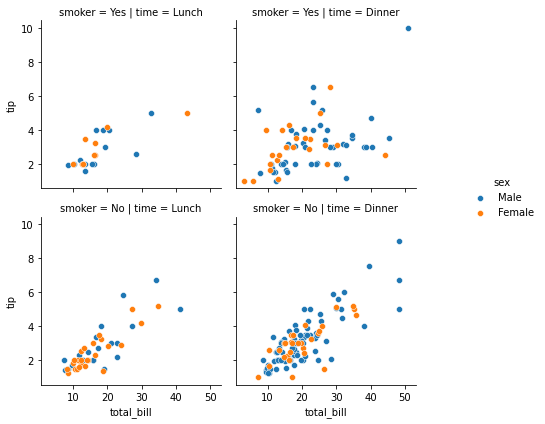

In [22]:
grd= sns.FacetGrid(tips, col= 'time', row= 'smoker', hue= 'sex')
grd.map(sns.scatterplot, 'total_bill', 'tip')
grd.add_legend(loc= 'upper right', bbox_to_anchor = (1.1, 0.6))

#### Some insights we can derive are:
 - Maximum and minimum both amount of tip are given by smokers.
 - In Lunch time, people who came are mostly non-smokers.
 - There is a linear relationship between tip and total_bill for non-smokers but it's not much clear for smokers.

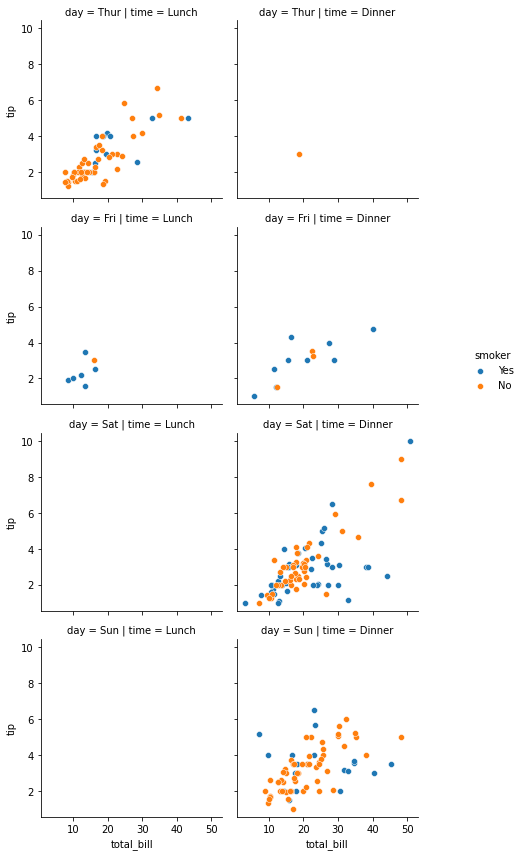

In [23]:
grd= sns.FacetGrid(tips, col= 'time', row= 'day', hue= 'smoker')
grd.map(sns.scatterplot, 'total_bill', 'tip')
grd.add_legend(loc= 'upper right', bbox_to_anchor = (1.1, 0.6))

#### Some insights we can derive are:
 - No. of non-smokers were greater than smokers on Thursday.
 - On Friday, most smoker persons had come.

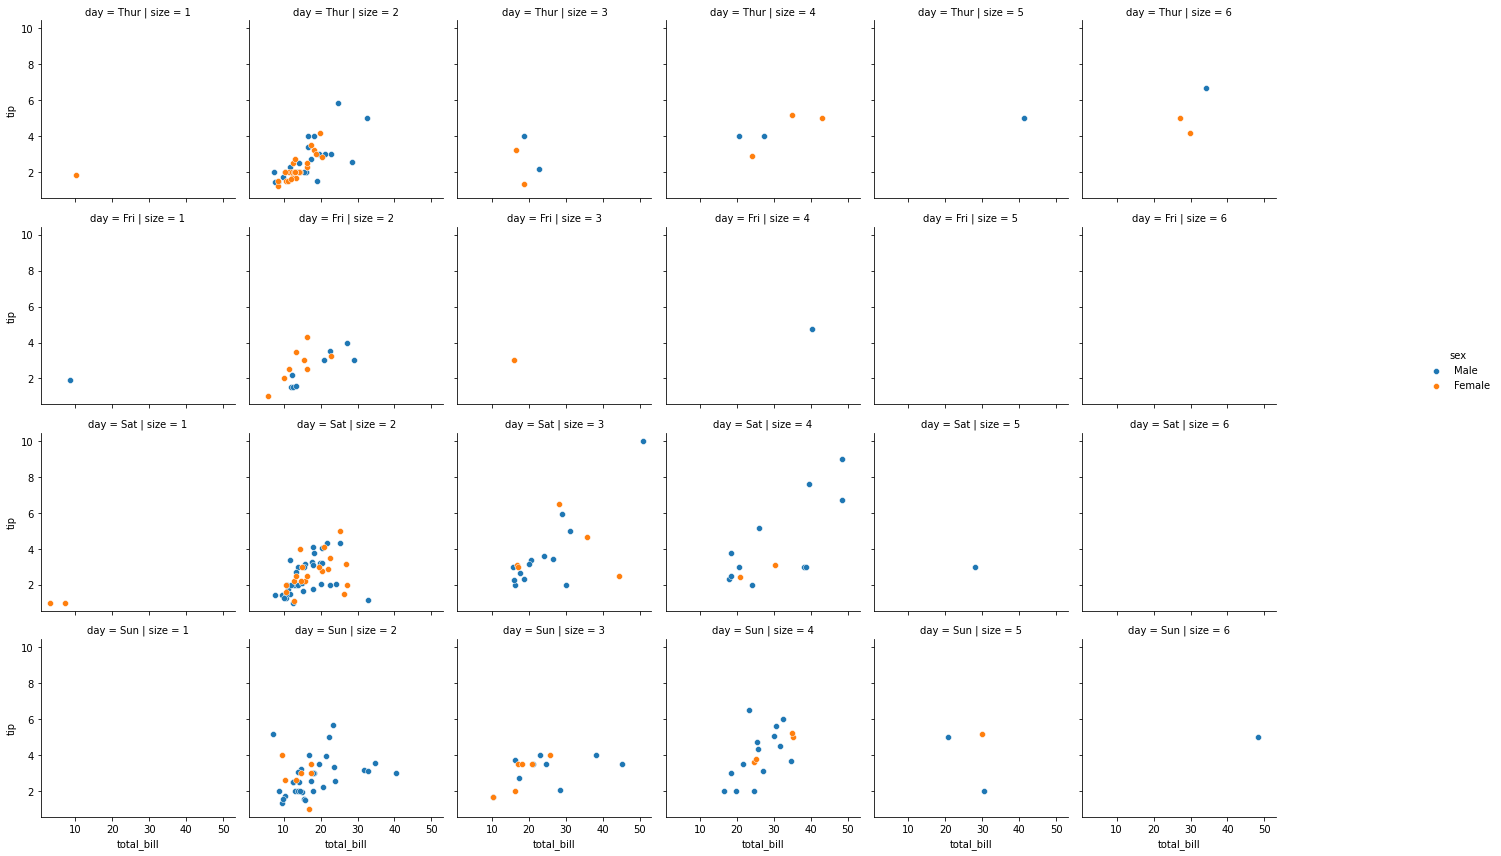

In [24]:
grd= sns.FacetGrid(tips, col= 'size', row= 'day', hue= 'sex')
grd.map(sns.scatterplot, 'total_bill', 'tip')
grd.add_legend(loc= 'upper right', bbox_to_anchor = (1.1, 0.6))

#### Some insights we can derive are:
 - Most people came with family size of 2, 3 and 4 where 2 is most common.
 - A very less no. of people came alone.

### Feature Engineering

In [25]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [27]:
for col in tips.drop('tip', axis= 1).columns:
    print(col, '---', tips[col].isnull().sum())

total_bill --- 0
sex --- 0
smoker --- 0
day --- 0
time --- 0
size --- 0


There are no null values present in any column.

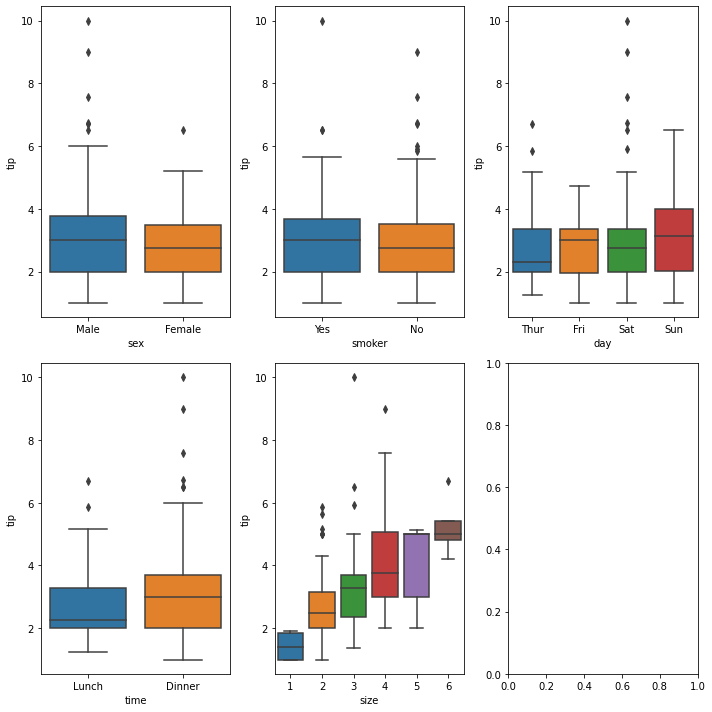

In [28]:
fig, axes = plt.subplots(2, 3, figsize= (10,10))
for col, ax in zip(tips.drop(['tip', 'total_bill'], axis= 1).columns, axes.flatten()):
    sns.boxplot(x= col, y= 'tip', data= tips, ax= ax)
plt.tight_layout()

<AxesSubplot:>

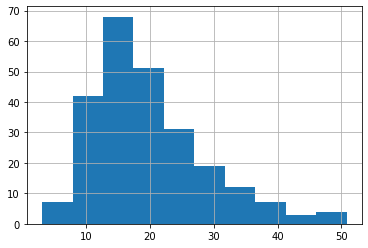

In [29]:
tips['total_bill'].hist()

'total_bill' column is rightly skewed.

<AxesSubplot:xlabel='total_bill'>

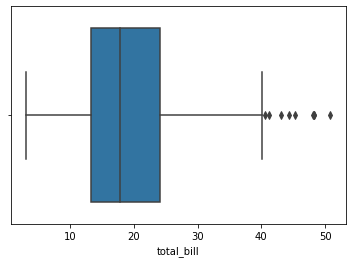

In [30]:
sns.boxplot(x= tips['total_bill'])

Some outliers are present here.

In [31]:
Q3 = tips['total_bill'].quantile(0.75)
Q1 = tips['total_bill'].quantile(0.25)
IQR = Q3 - Q1
upper_boundary = Q3 + 1.5 * IQR
lower_boundary = Q1 - 1.5 * IQR
upper_boundary, lower_boundary

(40.29749999999999, -2.8224999999999945)

In [32]:
tips[tips['total_bill'] < lower_boundary].shape[0], tips[tips['total_bill'] > upper_boundary].shape[0]

(0, 9)

No negative outliers, but only 9 positive outliers.

In [33]:
tips.loc[tips['total_bill'] > upper_boundary, 'total_bill'] = upper_boundary

<AxesSubplot:xlabel='total_bill'>

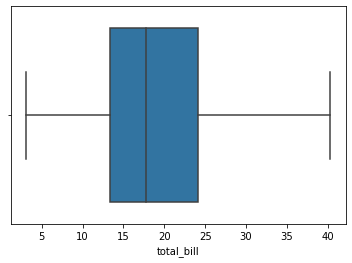

In [34]:
sns.boxplot(x= tips['total_bill'])

Outliers have been handled now.

Now our task is to convert categorical variables into numerical ones. Also we need to handle the discrete variable 'size'.

In [35]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
avg_tip_size = tips.groupby('size').mean()['tip']
avg_tip_size

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

<AxesSubplot:xlabel='tip', ylabel='size'>

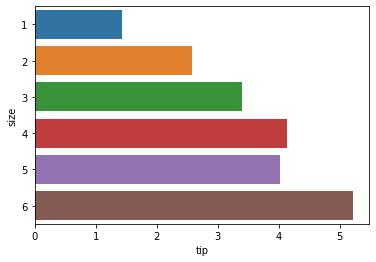

In [45]:
sns.barplot(x= avg_tip_size, y= avg_tip_size.index, orient= 'h')

From above plot, we can see that the average tip given by different groups. But surprisingly, average tip of 5 people is lesser than 4 people. Why??

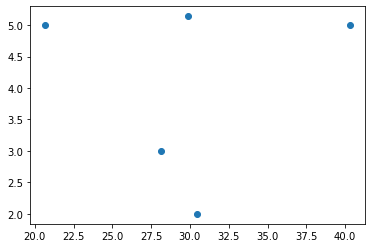

In [56]:
plt.scatter(x= tips[tips['size'] == 5]['total_bill'], y= tips[tips['size'] == 5]['tip'])

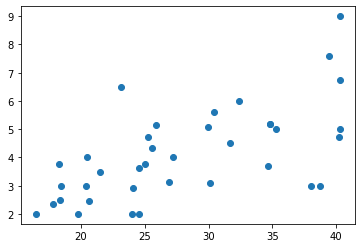

In [57]:
plt.scatter(x= tips[tips['size'] == 4]['total_bill'], y= tips[tips['size'] == 4]['tip'])

From two scatterplots above, we can guess some reasons:<br>
i) There are only 5 records of 5-grouped people whereas it's around 40 for 4-grouped one. If records are tiny, then it's not possible to interpret anything correctly.<br>
ii) We can see a linear relationship for 4-grouped people but it's pretty much scattered around for 5-grouped one.

But roughly, there is a linear relationship between tip and size.

Let's focus on categorical features

In [58]:
tips[tips['sex'] == 'Male']['tip'].mean()

3.0896178343949043

In [59]:
tips[tips['sex'] == 'Female']['tip'].mean()

2.8334482758620685

In [61]:
tips[tips['sex'] == 'Male']['total_bill'].mean()

20.485557324840762

In [60]:
tips[tips['sex'] == 'Female']['total_bill'].mean()

17.9785632183908

As Male persons tend to give more tips (because of their bigger amount of bills), than female persons, we will assign 0 to Female and 1 to Male.

In [62]:
tips['sex'] = np.where(tips['sex'] == 'Female', 0, 1)

In [63]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,No,Sat,Dinner,3
240,27.18,2.00,0,Yes,Sat,Dinner,2
241,22.67,2.00,1,Yes,Sat,Dinner,2
242,17.82,1.75,1,No,Sat,Dinner,2


Will do the same for 'smoker' and 'time' column.

In [66]:
tips[tips['smoker'] == 'Yes']['tip'].mean() , tips[tips['smoker'] == 'No']['tip'].mean()

(3.008709677419355, 2.9918543046357615)

In [67]:
tips[tips['time'] == 'Dinner']['tip'].mean() , tips[tips['time'] == 'Lunch']['tip'].mean()

(3.102670454545454, 2.728088235294118)

In [68]:
tips['smoker'] = np.where(tips['smoker'] == 'No', 0, 1)
tips['time'] = np.where(tips['time'] == 'Lunch', 0, 1)

In [69]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,1,2
1,10.34,1.66,1,0,Sun,1,3
2,21.01,3.50,1,0,Sun,1,3
3,23.68,3.31,1,0,Sun,1,2
4,24.59,3.61,0,0,Sun,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,1,3
240,27.18,2.00,0,1,Sat,1,2
241,22.67,2.00,1,1,Sat,1,2
242,17.82,1.75,1,0,Sat,1,2


In [74]:
tips.groupby('day')['tip'].mean().sort_values()

day
Fri     2.734737
Thur    2.771452
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [75]:
tips['day'] = tips['day'].map({'Fri': 0, 'Thur': 1, 'Sat': 2, 'Sun': 3})

In [76]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


### Feature Scaling and Model building (Only for Linear Regression)

In [112]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [113]:
X = tips.drop('tip', axis= 1)
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)
X_train.shape, X_test.shape

((170, 6), (74, 6))

In [114]:
stdScaler = StandardScaler()

#### With StandardScaler

In [115]:
tips_scaled = stdScaler.fit_transform(tips.drop('tip', axis= 1))
tips_stdScaler = pd.DataFrame(tips_scaled, columns= tips.drop('tip', axis= 1).columns)
lm_stdScaler = LinearRegression()
lm_stdScaler.fit(X_train, y_train)
y_pred = lm_stdScaler.predict(X_test)
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.8405300385155198, 1.359315886190934, 1.1658970306982235)

In [116]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
151,2.00,2.234058
34,3.27,2.827892
109,4.00,2.325180
4,3.61,3.857392
114,4.00,3.833372
...,...,...
54,4.34,3.902330
66,2.47,2.743194
176,2.00,2.578117
134,3.25,2.982714


### Using Decision Tree/RandomForest

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [118]:
X = tips.drop('tip', axis= 1)
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)
X_train.shape, X_test.shape

((170, 6), (74, 6))

In [120]:
tips_dtree= DecisionTreeRegressor()
tips_dtree.fit(X_train, y_train)
y_pred = tips_dtree.predict(X_test)
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(1.1345945945945948, 2.490240540540541, 1.578049600152207)

It looks like Decision Tree is performing worse than linear regression.

Let's attempt some hyperparameter tuning and check whether performance can improve or not.

In [135]:
hp = {'criterion': ["mse", "friedman_mse", "mae", "poisson"], 'max_depth': np.arange(3, 10), 'max_features': ["auto", "sqrt", "log2"]}
tips_dtree= DecisionTreeRegressor()
gs_dtree= GridSearchCV(tips_dtree, param_grid= hp, verbose= 1, cv= 3)
gs_dtree.fit(X_train, y_train)
gs_dtree.best_params_

Fitting 3 folds for each of 84 candidates, totalling 252 fits


{'criterion': 'mae', 'max_depth': 3, 'max_features': 'auto'}

In [136]:
y_pred = gs_dtree.predict(X_test)
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.7504054054054055, 1.1748425675675676, 1.0839015488353025)

See, we have improved the performance of decision tree a lot. MSE decreased significantly.

In [137]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
151,2.00,2.02
34,3.27,3.00
109,4.00,2.02
4,3.61,3.49
114,4.00,3.49
...,...,...
54,4.34,3.49
66,2.47,3.00
176,2.00,3.00
134,3.25,3.00


In [138]:
tips_rf= RandomForestRegressor()
tips_rf.fit(X_train, y_train)
y_pred = tips_rf.predict(X_test)
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.9394594594594596, 1.5338752205405417, 1.2384971621043552)

Let's optimize the random forest model

In [148]:
hp = {'n_estimators': np.arange(100, 151, 10), 'criterion': ["mse", "mae"], 'max_depth': np.arange(10, 21), 'max_features': ["auto", "sqrt", "log2"]}
tips_rf= RandomForestRegressor()
gs_rf= GridSearchCV(tips_rf, param_grid= hp, verbose= 1, cv= 3)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

Fitting 3 folds for each of 396 candidates, totalling 1188 fits


{'criterion': 'mae',
 'max_depth': 13,
 'max_features': 'sqrt',
 'n_estimators': 130}

In [149]:
y_pred = gs_rf.predict(X_test)
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.7848024948024948, 1.1726188784583402, 1.0828752829658363)

In [151]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
151,2.00,2.299115
34,3.27,2.660846
109,4.00,2.468115
4,3.61,3.586808
114,4.00,3.677885
...,...,...
54,4.34,3.916346
66,2.47,2.682154
176,2.00,3.126346
134,3.25,3.128385


We are getting less MSE and RMSE. So, choosing this model only.

### Saving the trained model into disk as a pickle file

In [150]:
import pickle

In [152]:
with open('Saved Model/tips_trained_model.pkl', 'wb') as file:
    pickle.dump(gs_rf, file)